In [305]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [306]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [307]:
# 실습1 p.265 <정규성 검정>

In [308]:
df=pd.read_csv("C:/python/1 Big Data 분석 기초/2sample_t_test.csv")

In [309]:
df

,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1
5,71.5,72.7,71.5,1
6,74.5,66.9,74.5,1
7,77.5,70.2,77.5,1
8,76.4,74.4,76.4,1
9,77.7,70.1,77.7,1


In [310]:
data1=df['Mat_A'].loc[0:9] # 10~19행은 결측치이므로 제거하고 판단

In [311]:
data1

0    73.4
1    77.0
2    73.7
3    73.3
4    73.1
5    71.5
6    74.5
7    77.5
8    76.4
9    77.7
Name: Mat_A, dtype: float64

In [312]:
# Mat_A의 정규성 검정
stats.shapiro(data1)
statistic, p=stats.shapiro(data1)
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic,p))

Shapiro-Wilk Test : statistic=0.9062638878822327, p-value=0.25630074739456177


In [313]:
# 정규성 검정 결과(95% 신뢰수준 사용시) p-value가 0.05보다 크면 정규, 0.05보다 작으면 비정규로 판단
# 따라서 변수, Mat_A는 p-value 0.256으로 정규분포를 따른다

In [314]:
data2=df['Mat_B'].loc[0:9] # 10~19행은 결측치이므로 제거하고 판단

In [315]:
data2

0    68.7
1    71.4
2    69.8
3    75.3
4    71.3
5    72.7
6    66.9
7    70.2
8    74.4
9    70.1
Name: Mat_B, dtype: float64

In [316]:
# Mat_B의 정규성 검정
stats.shapiro(data2)
statistic2, p2=stats.shapiro(data2)
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic2,p2))

Shapiro-Wilk Test : statistic=0.9729756116867065, p-value=0.9169799089431763


In [317]:
# 정규성 검정 결과(95% 신뢰수준 사용시) p-value가 0.05보다 크면 정규, 0.05보다 작으면 비정규로 판단
# 따라서 변수, Mat_B는 p-value 0.916으로 정규분포를 따른다

In [318]:
# 실습2 p.268 <모평균 구간추정>
df2=pd.DataFrame({'sample':[18,18,20,21,20,23,19,18,17,21,22,20,20,210,20,19,19,18,17,19]})
df2.head()

,sample
0,18
1,18
2,20
3,21
4,20


In [319]:
lower,upper=stats.norm.interval(0.95, loc=np.mean(df2), scale=3.8/np.sqrt(20))
print("신뢰구간 : ({0},{1})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([27.28],[30.62])


C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [320]:
# 신품종 배추의 평균 무게에 대한 95% 신뢰구간은 (27.28, 30.62)이다. 

In [321]:
# 실습3 p.271 <모평균 신뢰구간 추정 - 모표준편차를 모르는 경우>
df=pd.DataFrame({'sample': [73, 71, 74, 69, 70, 73, 70, 68, 75, 72, 70, 72, 73, 70, 70, 72, 71, 70, 75, 72]})
df.head()

,sample
0,73
1,71
2,74
3,69
4,70


In [322]:
lower, upper = stats.t.interval(0.95, len(df)-1, loc=np.mean(df), scale=stats.sem(df))
print("신뢰구간 : ({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([70.6], [72.4])


C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [323]:
# 시험 생산된 강종의 모평균 값 95% 신뢰구간은 (70.6, 72.4)이다. 

In [324]:
# 제품 개발자는 새로 개발된 강종의 평균 인장강도를 70kg/mm^2로 기대하고 있는데, 모평균값의 95% 신뢰구간은 (70.6, 72.4)이므로 기대에 미칠 수 있다. 

<AxesSubplot:>

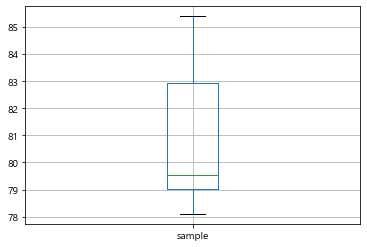

In [325]:
# 실습4 p.296 <1-Sample t-test>
# 귀무가설 : mu=76.7 (만족도를 변화시키지 못했다)
# 대립가설 : mu!=76.7 (만족도를 변화시켰다)
# 유의수준 : a=0.05
df=pd.DataFrame({'sample': [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})
df.boxplot(['sample'])

In [326]:
t_result=stats.ttest_1samp(df, 78.0)
t,p=t_result.statistic.round(3), t_result.pvalue.round(3)

In [327]:
print("1-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

1-Sample t-test
t 통계량 : [3.379]
p-value : [0.008]


In [328]:
# 유의수준 5%에서 검정결과 p값이 0.008이므로 0.05보다 작다. 따라서 대립가설을 채택하므로 개선활동이 만족도를 변화시켰다. 

<AxesSubplot:>

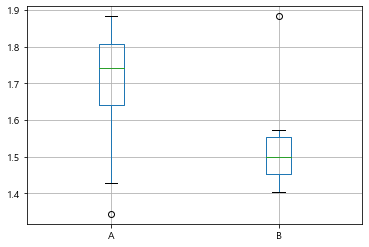

In [329]:
# 실습5 p.299 <두 집단 간 평균이 같은지 비교>
# 귀무가설 : 공급자 간에 모평균 차이가 없다
# 대립가설 : 공급자 간에 모평균 차이가 있다.
# 유의수준 a=0.05
df=pd.DataFrame({'A':[1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344], 'B':[1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.883]})
df.boxplot(['A','B'])

In [330]:
# box plot 분석 결과 A공급자의 제품 두께가 전반적으로 더 두껍다는 것을 알 수 있다.

In [331]:
# A,B 정규성 검정
statistic, p=stats.shapiro(df['A'])
print("Statistic={}, p-value={}".format(statistic,p))

Statistic=0.8425756096839905, p-value=0.08004552870988846


In [332]:
# p-value가 0.08로 0.05보다 크므로 귀무가설 채택. 따라서 A는 정규성이 있다. 

In [333]:
statistic, p=stats.shapiro(df['B'])
print("Statistic={}, p-value={}".format(statistic,p))

Statistic=0.7734811902046204, p-value=0.014793740585446358


In [335]:
# p-value가 0.01로 0.05보다 작으므로 귀무가설 기각. 따라서 B는 정규성이 없다. 

In [336]:
# 등분산성 검정 : B가 정규성이 없으므로 Levene test 이용
stats.levene(df['A'], df['B'])

LeveneResult(statistic=0.4408416728536036, pvalue=0.5175025061092301)

In [337]:
# p-value가 0.5로 0.05보다 크므로 등분산성 있다.

In [338]:
t_result=stats.ttest_ind(df['A'], df['B'])

In [339]:
t,p=t_result.statistic.round(3), t_result.pvalue.round(3)

In [340]:
print("2-Sample t-test")
print("t: {}".format(t))
print("p: {}".format(p))

2-Sample t-test
t: 1.7
p: 0.111


In [341]:
# 유의수준 5%에서 검정결과 p값이 0.111이므로 0.05보다 크다. 따라서 귀무가설을 채택하며 공급자간에 모평균에 차이가 있다고 할 수 없다. 

In [342]:
# 실습6 p.302 <paired t-test>
# 귀무가설 : 회사원들의 성적은 학원가기 전후에 대해 차이가 없다.
# 대립가설 : 회사원들의 성적은 학원가기 전후에 차이가 있다. 
df1=pd.DataFrame({'before':[720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2=pd.DataFrame({'after' : [710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

In [343]:
t_result=stats.ttest_rel(df1, df2)
t,p=t_result.statistic.round(3), t_result.pvalue.round(3)

In [344]:
print("Paired t-test")
print("t: {}".format(t))
print("p: {}".format(p))

Paired t-test
t: [-2.266]
p: [0.05]


In [345]:
# 검정 결과 p값이 0.05이므로 대립가설을 채택. 따라서 회사원들의 성적은 학원가기 전후에 차이가 있다.

In [346]:
# 실습7 p.307 <1 proportion test>
# 귀무가설 : p=0.5
# 대립가설 : p!=0.5
# 유의수준 a=0.05

# 변수 선언
count=40
n_obs=100
value=0.5

stat,pval=proportions_ztest(count,n_obs,value)

In [347]:
print("1 Proportion test")
print('z: {0:0.3f}'.format(stat))
print('p: {0:0.3f}'.format(pval))

1 Proportion test
z: -2.041
p: 0.041


In [349]:
# 결과적으로 p-value가 0.041이다. 따라서 0.05보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택한다.
# 따라서 이 동전은 정상이 아니다.

In [350]:
# 실습8 p.310 <2 proportion test>
# 귀무가설 : pA=pB
# 대립가설 : pA!=pB
# 유의수준 a=0.05

count=np.array([14,5])
nobs=np.array([1200,1200])

stat,pval=proportions_ztest(count, nobs)

In [351]:
print("2 Proportion Test")
print("z: {0:0.3f}".format(stat))
print("p: {0:0.3f}".format(pval))

2 Proportion Test
z: 2.073
p: 0.038


In [352]:
# 따라서 p-value가 0.038로 0.05보다 작으므로 귀무가설 기각하고 대립가설을 채택한다.
# 결과적으로 두 공정을 불량률은 다르다.

In [356]:
# 실습9 p.319 <카이제곱 검정>
df=pd.DataFrame({'A':[18,1,8,7,10,9,10], 'B':[8,2,14,5,5,9,4], 'C':[4,1,3,4,9,5,4], 'D':[4,1,2,3,2,7,3], 'E':[3,1,3,1,1,1,1],'F':[3,25,8,10,2,1,7]})
df.head()

,A,B,C,D,E,F
0,18,8,4,4,3,3
1,1,2,1,1,1,25
2,8,14,3,2,3,8
3,7,5,4,3,1,10
4,10,5,9,2,1,2


In [357]:
chi, pval, dof, expected=stats.chi2_contingency(df)

In [358]:
print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))
print('degree of freedom : {}'.format(dof))
print('expected value :\n{}'.format(expected.round(3)))

chi-square test
chisq : 98.274
p: 0.000
degree of freedom : 30
expected value :
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


In [359]:
# 따라서 p-value가 0.05보다 작으므로 결과적으로 각 제품에 대해 이미지에 대해 차이가 있다.

In [360]:
# 실습10 p.325 <ANOVA>
df=pd.read_csv("C:/python/1 Big Data 분석 기초/ANOVA.csv")
df

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a
5,34.9,F,a,a
6,33.1,A,b,a
7,29.9,B,b,a
8,31.7,C,b,a
9,27.5,D,b,a


In [361]:
df.groupby(['gangjong','type'])['time'].size()

gangjong  type
a         a       6
b         a       6
c         b       6
d         b       6
Name: time, dtype: int64

In [362]:
# ANOVA.csv 데이터는 강종별과 type에 따라 (a,a), (b,a), (c,b), (d,b)로 구분할 수 있음

In [363]:
# gangjong이 a, type이 a인 2차정련시간 저장
da = df[df['gangjong']=='a']['time']

In [364]:
da

0    32.2
1    30.4
2    33.6
3    36.4
4    33.9
5    34.9
Name: time, dtype: float64

In [365]:
# gangjong이 b, type이 a인 data의 2차 정련시간 저장
db = df[df['gangjong']=='b']['time']

In [366]:
db.reset_index(drop=True, inplace=True)

In [367]:
# gangjong이 c, type이 b인 data의 2차 정련시간 저장
dc=df[df['gangjong']=='c']['time']
dc.reset_index(drop=True, inplace=True)

In [368]:
# gangjong이 d, type이 b인 data의 2차 정련시간 저장
dd=df[df['gangjong']=='d']['time']
dd.reset_index(drop=True, inplace=True)

In [373]:
df1=pd.DataFrame()
df1['A']=da
df1['B']=db
df1['C']=dc
df1['D']=dd

In [375]:
# 강종별과 type에 따른 2차 정련 시간 데이터프레임 생성
# column A,B,C,D는 각각 (gangjong, type)에서 (a,a), (b,a), (c,b), (d,b)를 나타냄
df1
# 가설 설정
# 귀무가설 : 강종별과 type에 따라 2차 정련 시간에 차이가 없다.
# 대립가설 : 강종별과 type에 따라 2차 정련 시간에 적어도 하나의 차이가 있다. 

,A,B,C,D
0,32.2,33.1,32.6,26.7
1,30.4,29.9,32.7,28.5
2,33.6,31.7,29.3,30.9
3,36.4,27.5,25.9,26.2
4,33.9,34.0,31.1,32.3
5,34.9,30.7,23.8,23.7


<AxesSubplot:>

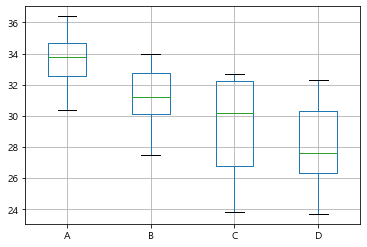

In [376]:
df1.boxplot(['A','B','C','D'])

In [377]:
# A,B,C,D 정규성 검정 : Shapiro-Wilk Test
statistic, p=stats.shapiro(df1['A'])
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.9879404902458191, p-value=0.9835584163665771


In [378]:
# 따라서 A는 p-value가 0.98이므로 정규성이 있다. 

In [379]:
statistic, p=stats.shapiro(df1['B'])
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.9769707918167114, p-value=0.9355478286743164


In [380]:
# 따라서 B는 p-value가 0.93이므로 정규성이 있다. 

In [381]:
statistic, p=stats.shapiro(df1['C'])
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.8929418921470642, p-value=0.33389002084732056


In [382]:
# 따라서 C는 p-value가 0.33이므로 정규성이 있다. 

In [383]:
statistic, p=stats.shapiro(df1['D'])
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.9713903665542603, p-value=0.9016408920288086


In [384]:
# 따라서 D는 p-value가 0.9이므로 정규성이 있다. 

In [385]:
# 등분산성 검정 : Bartlett test (모두 다 정규성이 있으니까.)
stats.bartlett(df1['A'], df1['B'], df1['C'], df1['D'])

BartlettResult(statistic=1.8729084232387967, pvalue=0.5991991808067023)

In [386]:
# 따라서 A,B,C,D는 p-value가 0.6이므로 등분산성이 있다. 

In [387]:
# ANOVA 실행
f_result=stats.f_oneway(df1['A'], df1['B'], df1['C'], df1['D'])
f,p=f_result.statistic.round(3), f_result.pvalue.round(3)

In [388]:
print("One-way")
print("F 통계량 : {}".format(f))
print("p-value : {}".format(p))

One-way
F 통계량 : 4.172
p-value : 0.019


In [389]:
# 결과적으로 p-value는 0.019이므로 0.05보다 작아서 귀무가설은 기각되고 대립가설이 채택된다.
# 따라서 강종별과 type에 따라 2차 정련 시간에는 적어도 하나의 차이가 있다. 

In [390]:
# 실습 11 p.330 <상관분석>

In [391]:
# 초코칩의 강도와 재료 반죽 온도 간에 관계를 분석하기 위한 상관 분석
df1=[37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
df2=[14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 14, 16, 18, 13, 15, 17, 14, 16, 20, 21]

In [392]:
corr, pval=stats.pearsonr(df1, df2)

In [393]:
print("Correlation Analysis")
print("corr : {0:0.3f}".format(corr))
print("p-value : {0:0.3f}".format(pval))

Correlation Analysis
corr : -0.723
p-value : 0.000


In [395]:
# 결과적으로 상관계수가 -0.723이므로 '강한 음의 상관관계'를 보인다.